# Signal Generation

### Libraries Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import yaml
import sys
import os

# Adding parent directory to path
sys.path.append(os.path.abspath('..'))

from src.generation import simulate_trial

# Loading configuration
with open('../config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print("Config loaded successfully.")
print(f"Sampling Rate: {config['signal_generation']['srate']} Hz")

Config loaded successfully.
Sampling Rate: 2000 Hz


### Signal Generation Loop

In [2]:
# Extracting parameters
params = config['signal_generation']
n_trials = params['n_trials']
duration = params['duration']
srate = params['srate']

# Lists for data storage
raw_data = []
labels = []

print(f"Generation of {n_trials} trials...")

for i in range(n_trials):
    # Random decision of trial type
    trial_type = np.random.choice(['Left', 'Right'])
    
    # Trial data generation
    trial_signal = simulate_trial(duration, srate, trial_type, noise_level=8.0)
    
    # Storing data
    raw_data.append(trial_signal)
    labels.append(trial_type)

# Array conversion
X_raw = np.array(raw_data)
y_labels = np.array(labels)

# Tensor Shape: (Trials x channels x Time)
print(f"Raw Data Tensor Shape: {X_raw.shape}")

Generation of 100 trials...
Raw Data Tensor Shape: (100, 2, 12000)


### Raw EEG Signals

Plot saved to ../data/03_results


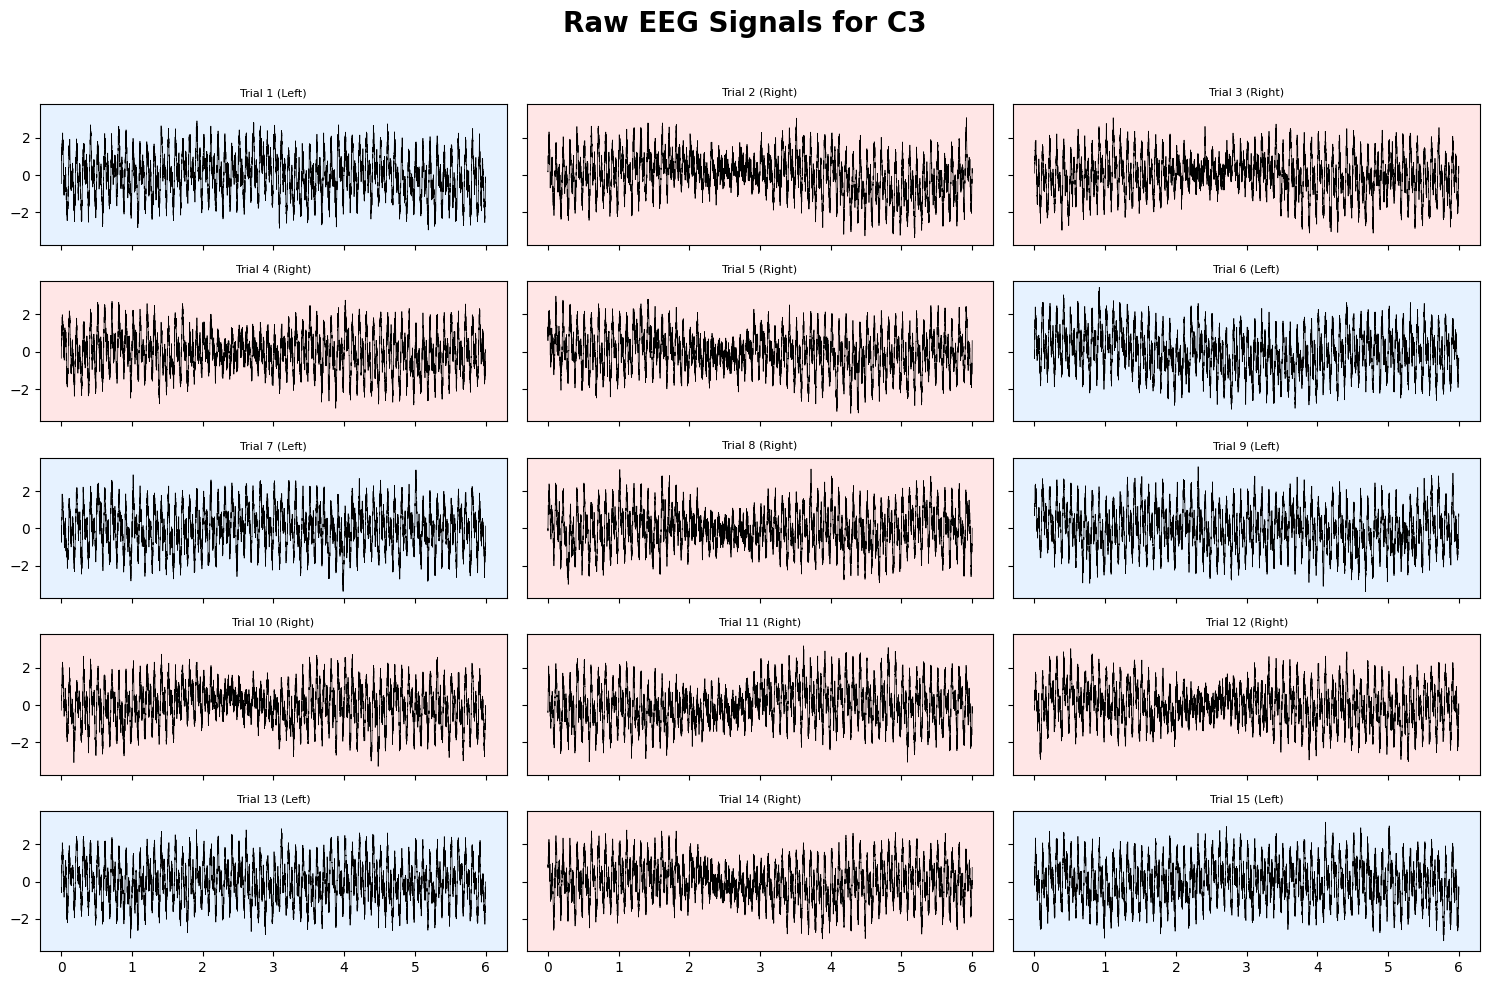

In [3]:
# Creating a 5x3 grid
fig, axes = plt.subplots(5, 3, figsize=(15, 10), sharex=True, sharey=True)

# Main title
fig.suptitle("Raw EEG Signals for C3", fontsize=20, fontweight='bold')

axes = axes.flatten()

time_axis = np.linspace(0, duration, X_raw.shape[2])

for i in range(15):
    # Plotting C3 for first 15 trials
    ax = axes[i]
    ax.plot(time_axis, X_raw[i, 0, :], color='k', lw=0.5)
    
    if y_labels[i] == 'Left':
        ax.set_facecolor('#e6f2ff')
    else:
        ax.set_facecolor('#ffe6e6')
        
    ax.set_title(f"Trial {i+1} ({y_labels[i]})", fontsize=8)

# Saving the figure
save_dir = '../data/03_results'
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, 'raw_eeg_signals_c3.png')

plt.savefig(save_path, dpi=300)
print(f"Plot saved to {save_dir}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Raw EEG Heatmap

Plot saved to ../data/03_results


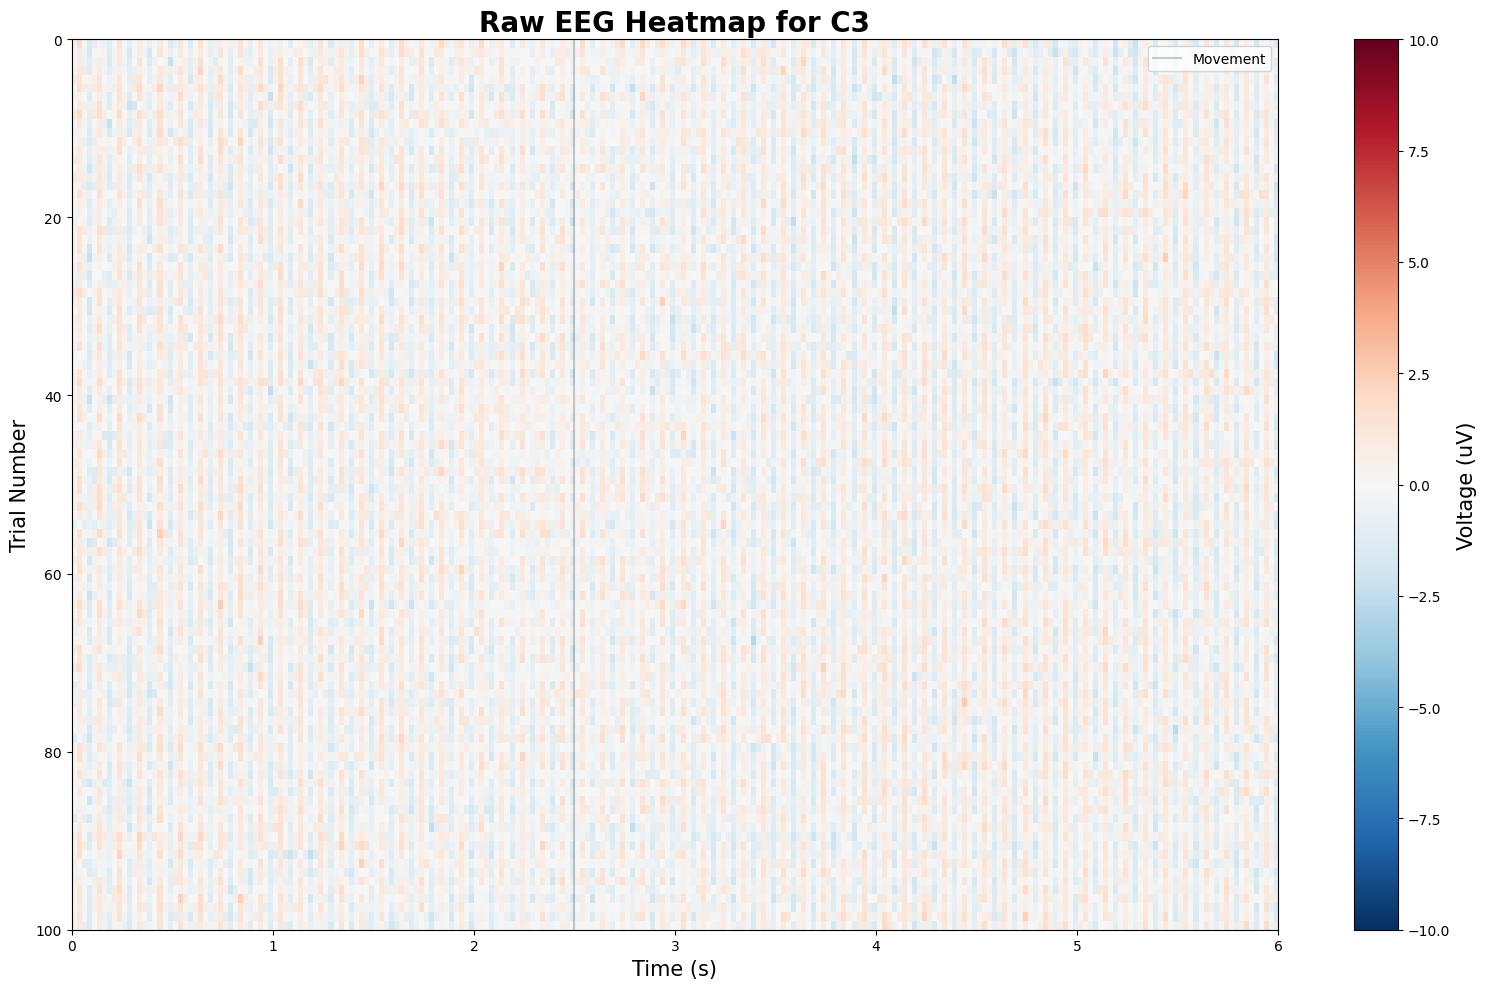

In [4]:
plt.figure(figsize=(16, 10))

# Plotting C3 for every trial
step = 50
im = plt.imshow(X_raw[:, 0, ::step], aspect='auto', cmap='RdBu_r', 
           extent=[0, duration, n_trials, 0], vmin=-10, vmax=10)

cbar = plt.colorbar(im)
cbar.set_label('Voltage (uV)', fontsize=15, labelpad=5, rotation=-270)

plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Trial Number', fontsize=15)
plt.title('Raw EEG Heatmap for C3', fontsize=20, fontweight='bold')

# Adding movement line
plt.axvline(x=2.5, color='k', alpha=0.2, label='Movement')
plt.legend()

# Saving the figure
save_dir = '../data/03_results'
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, 'raw_eeg_heatmap_c3.png')

plt.savefig(save_path, dpi=300)
print(f"Plot saved to {save_dir}")

plt.tight_layout()
plt.show()

### Saving Raw EEG Data

In [5]:
save_dir = '../data/01_raw'
os.makedirs(save_dir, exist_ok=True)

np.save(f'{save_dir}/dataset.npy', X_raw)
np.save(f'{save_dir}/labels.npy', y_labels)

print(f"Raw EEG Data saved to {save_dir}")

Raw EEG Data saved to ../data/01_raw
